# Mini Project - Predict Customer Clicked Ads Classification by Using Machine Learning

## Stage 1: Customer Type and Behaviour Analysis on Advertisement

### Import File and Library

In [ ]:
!gdown 1hq9MInDOaeNwVoJ0j7IOXaoRn6knJ1LC

Downloading...
From: https://drive.google.com/uc?id=1hq9MInDOaeNwVoJ0j7IOXaoRn6knJ1LC
To: /content/Clicked Ads Dataset.csv
100% 95.1k/95.1k [00:00<00:00, 55.0MB/s]


In [ ]:
! pip install shap
! pip install ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 8.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=9db5f4e7f24b8a0792a1db43014a44d9a032fee596078c0c647ad24fdbfc32bf
  Stored in directory: /root/.cache/pip/wheels/d8/2d/fc/c1699298a1241684a460b125835f7871ee8e3ab3afea9b5d6f
Successfully built ppscore


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter(action = 'ignore', category = FutureWarning)
from google.colab import files
from IPython.display import HTML

from scipy import stats

from datetime import datetime
import ppscore as pps

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, log_loss
import shap

### Load Dataset

In [ ]:
df = pd.read_csv('/content/Clicked Ads Dataset.csv')
df.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
243,243,85.03,30,422608480.0,204.52,Perempuan,6/19/2016 9:24,No,Balikpapan,Kalimantan Timur,Otomotif
352,352,78.19,30,437331930.0,228.81,Perempuan,1/31/2016 6:14,No,Pakanbaru,Riau,Food
354,354,74.87,52,305889710.0,126.97,Perempuan,5/31/2016 2:17,Yes,Surakarta,Jawa Tengah,Travel
937,937,50.60,48,461696970.0,135.67,Perempuan,1/15/2016 22:49,Yes,Bandung,Jawa Barat,Travel
873,873,72.19,32,427473060.0,250.32,Laki-Laki,4/22/2016 19:45,No,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Electronic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [ ]:
nums = []
cats = []

for i in df :
  if df[i].dtype in ['int64','float64'] :
    nums.append(i)
  else :
    cats.append(i)
print(nums)
print(cats)

['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category']


In [ ]:
df[nums].describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [ ]:
df[cats].describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


In [ ]:
# Check Categorical columns total value
for col in cats:
    print('------------------------------')
    print(f'''Unique Value count column {col}:''')
    print(df[col].value_counts())
    print('------------------------------', '\n')

------------------------------
Unique Value count column Male:
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64
------------------------------ 

------------------------------
Unique Value count column Timestamp:
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64
------------------------------ 

------------------------------
Unique Value count column Clicked on Ad:
No     500
Yes    500
Name: Clicked on Ad, dtype: int64
------------------------------ 

------------------------------
Unique Value count column city:
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam 

### Univariate Analysis

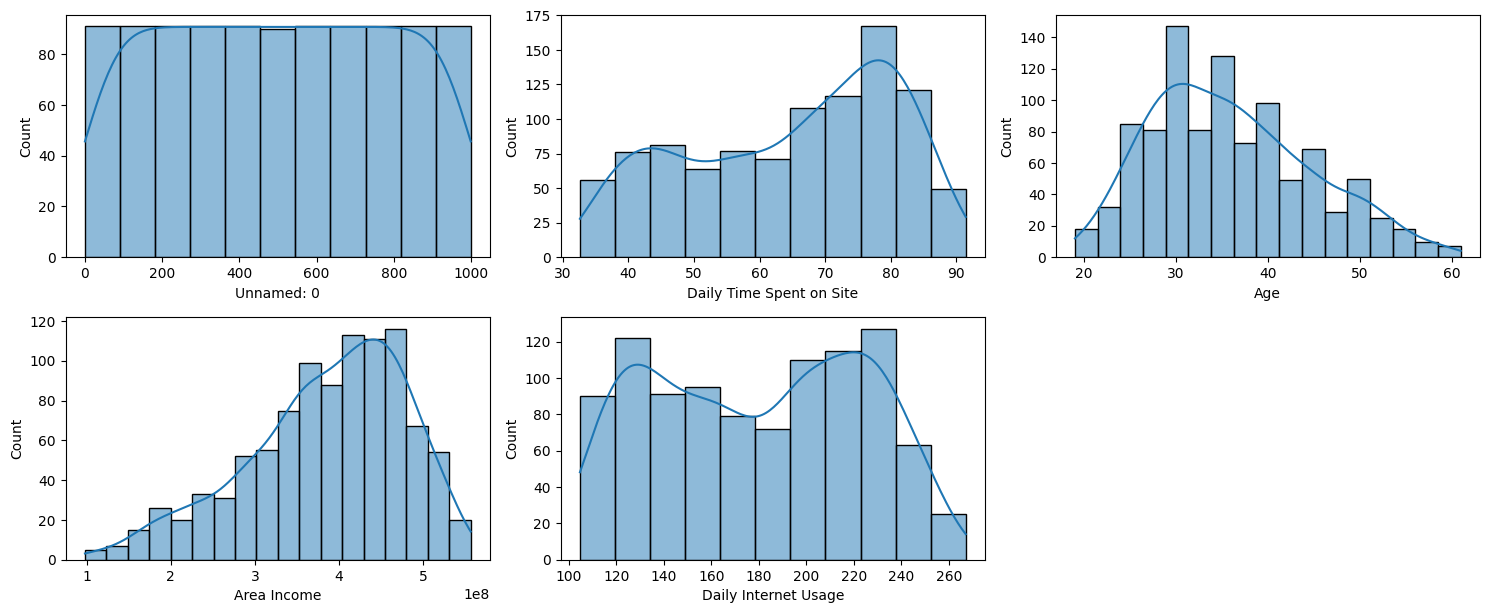

In [ ]:
plt.figure(figsize=(15, 30))
for i in range(0, len(nums)):
    plt.subplot(10, 3, i+1)
    sns.histplot(df[nums[i]], kde = True)
    plt.tight_layout()

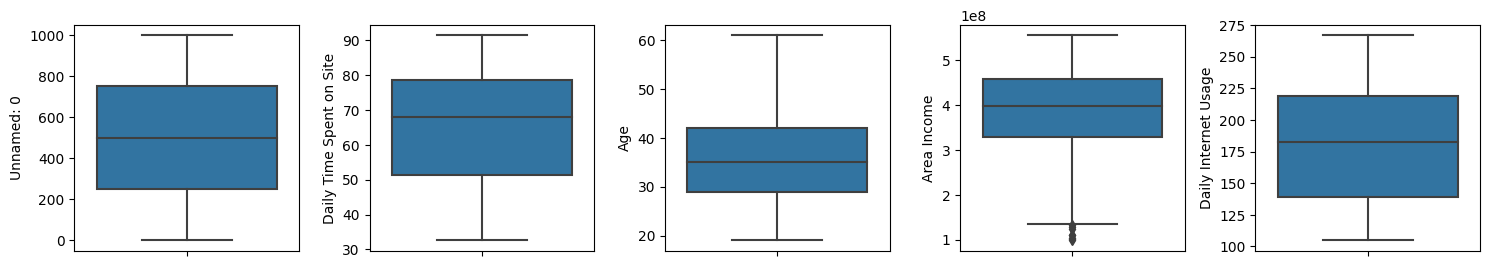

In [ ]:
plt.figure(figsize=(15, 30))
for i in range(0, len(nums)):
    plt.subplot(12, 5, i+1)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()

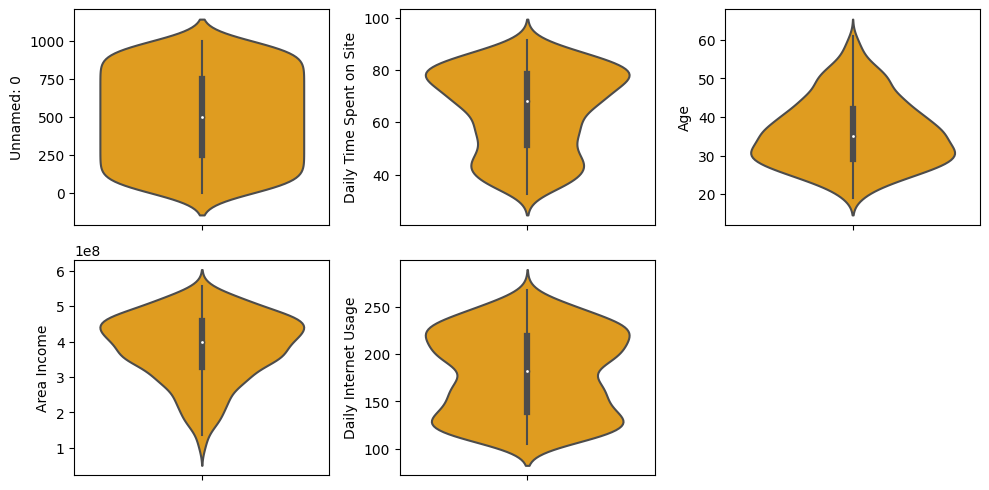

In [ ]:
plt.figure(figsize=(10, 30))
for i in range(0, len(nums)):
    plt.subplot(12, 3, i+1)
    sns.violinplot(y=df[nums[i]], color='orange', orient='v')
    plt.tight_layout()

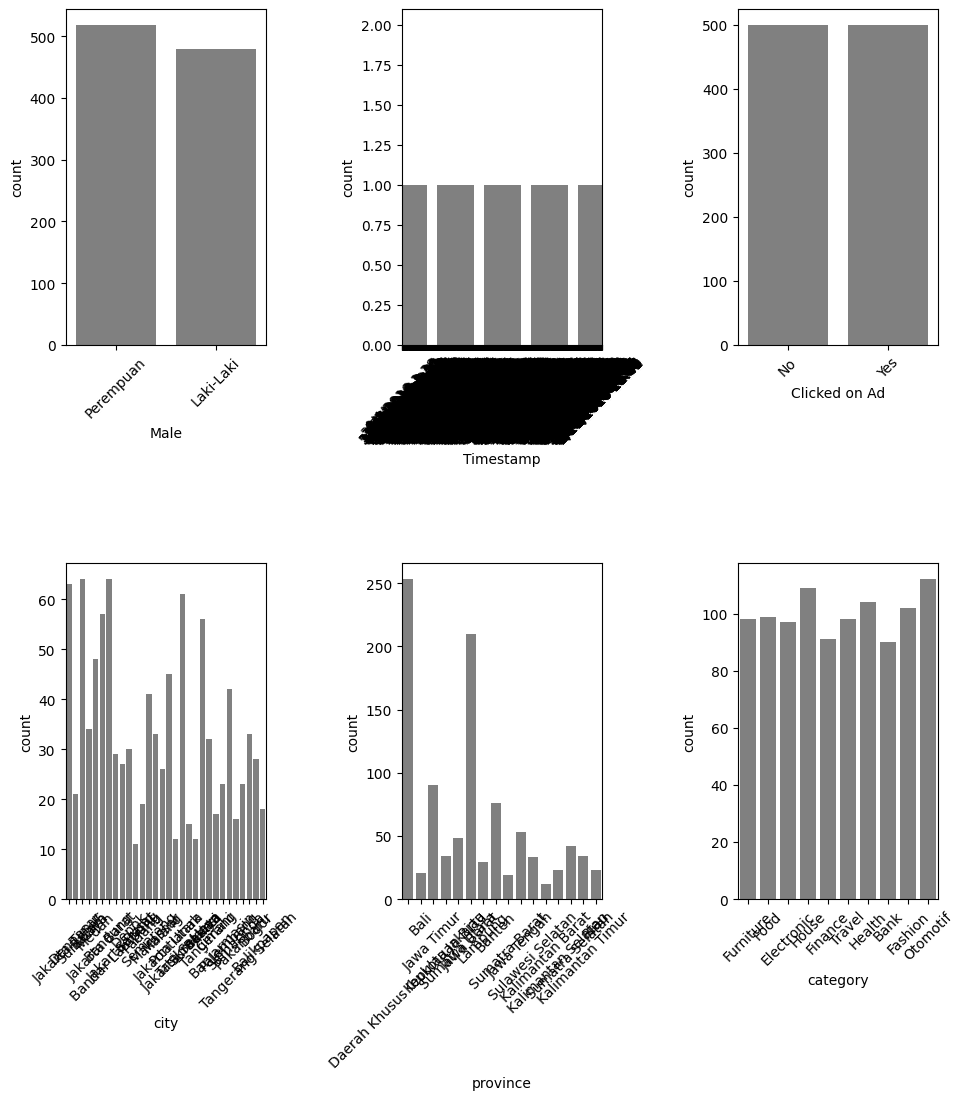

In [ ]:
# Countplot untuk melihat persebaran data variabel categorical 
plt.figure(figsize=(10,15))
for i in range (0, len(cats[0:])):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[cats[0:][i]], color='gray', orient='h')
    plt.tick_params(axis='x', rotation=45)
    plt.tight_layout(pad=2)

### Bivariate Analysis

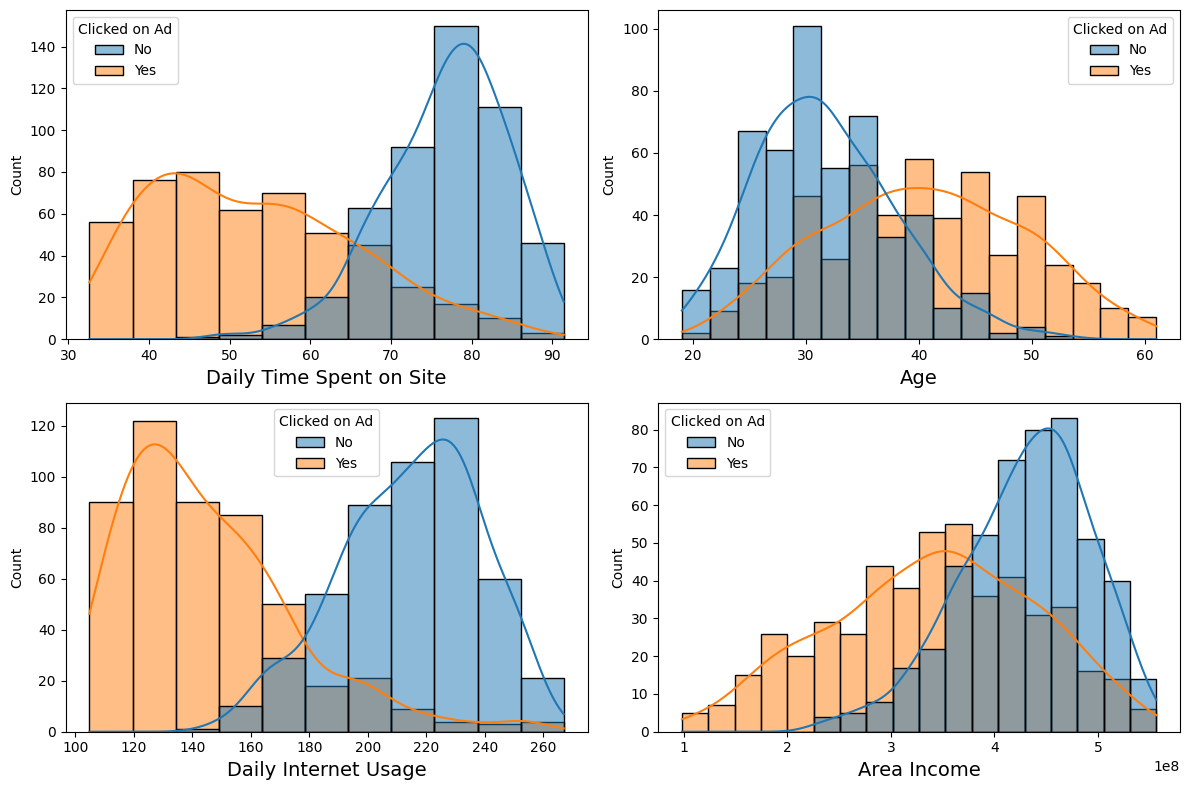

In [ ]:
plt.figure(figsize=(12, 8))
features = ['Daily Time Spent on Site',	'Age','Daily Internet Usage','Area Income']

for i in range(0,len(features)):
    plt.subplot(2,2,i+1)
    sns.histplot(x=df[features[i]], hue=df['Clicked on Ad'], kde=True)
    plt.xlabel(features[i], fontsize=14)
    plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

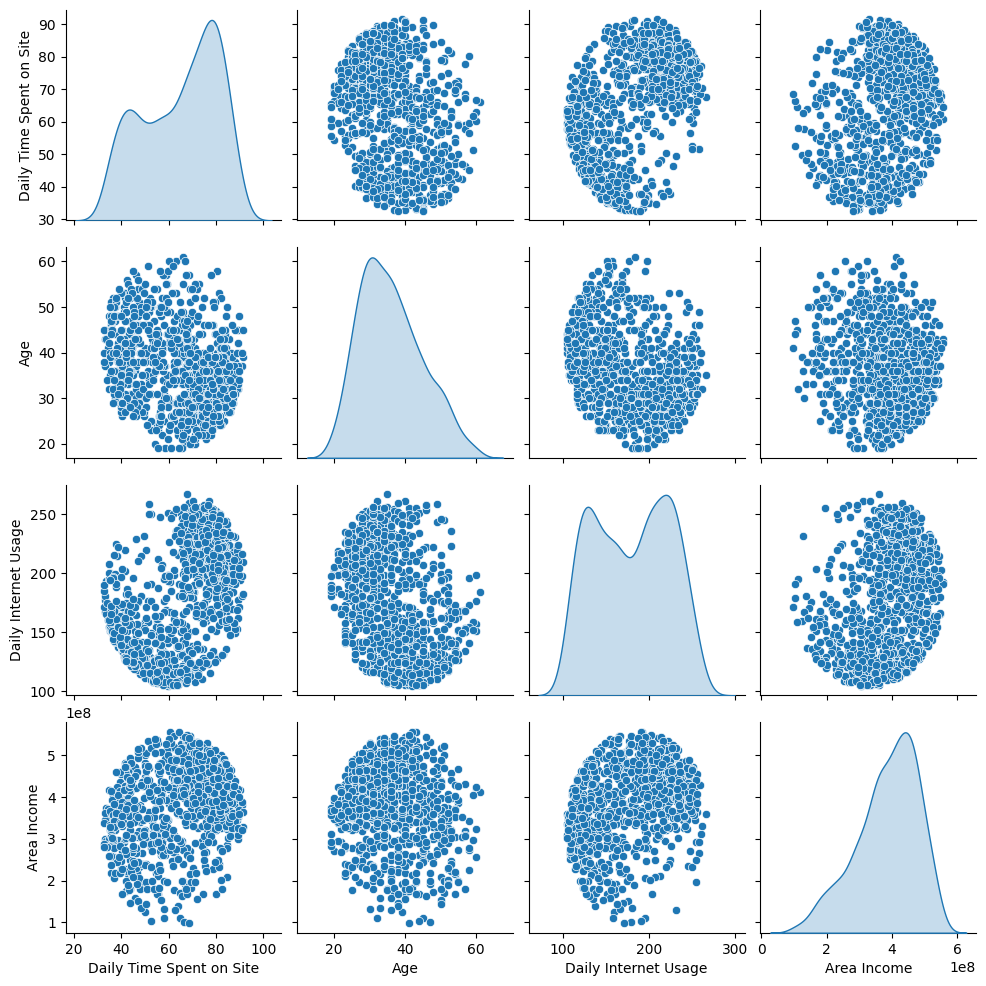

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df[['Daily Time Spent on Site', 'Age', 'Daily Internet Usage', 'Area Income', 'Clicked on Ad']], diag_kind='kde')

<Figure size 1500x1500 with 0 Axes>

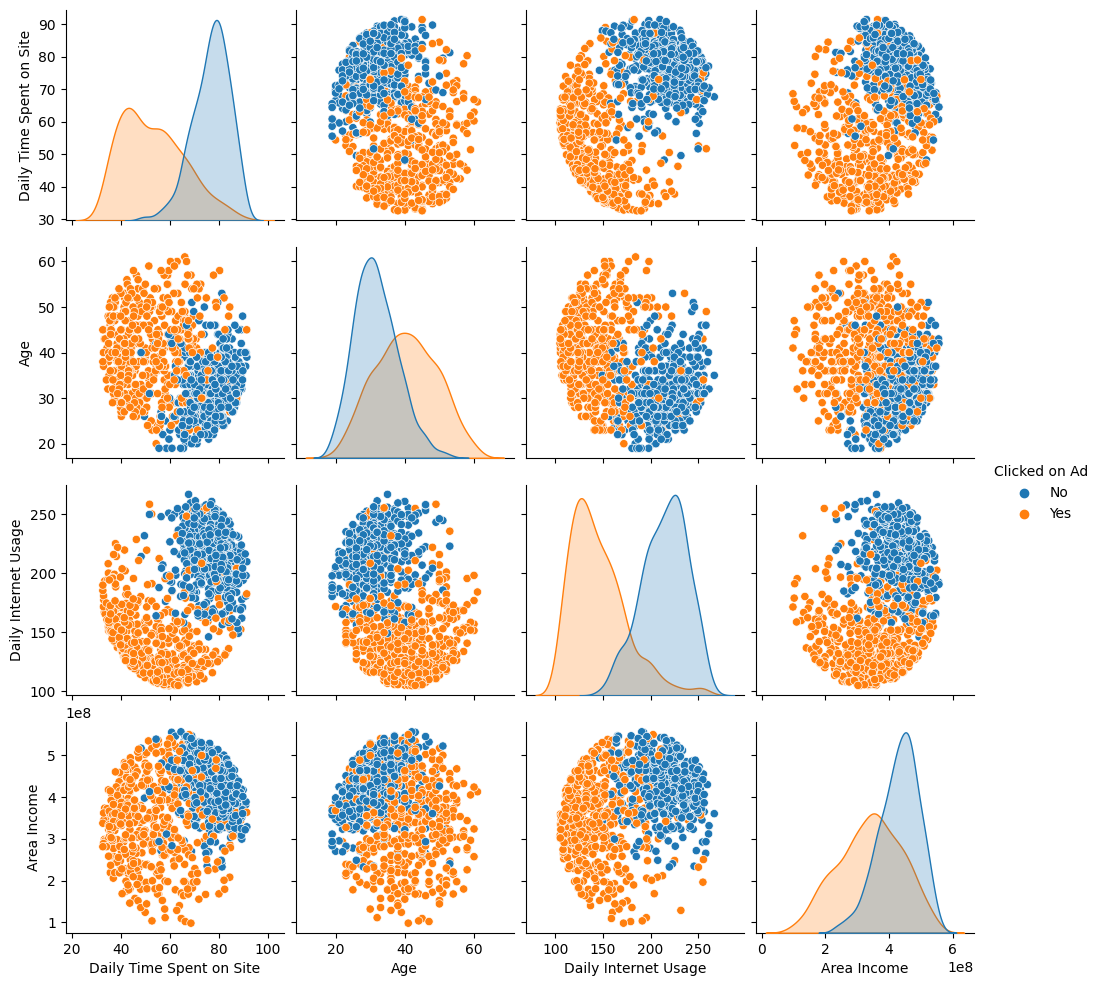

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df[['Daily Time Spent on Site',	'Age', 'Daily Internet Usage', 'Area Income', 'Clicked on Ad']], diag_kind='kde',hue='Clicked on Ad')

### Multivariate Analysis

In [ ]:
df.corr()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Unnamed: 0,1.000000,-0.032637,0.001835,-0.056862,-0.004842
Daily Time Spent on Site,-0.032637,1.000000,-0.331424,0.308266,0.518294
Age,0.001835,-0.331424,1.000000,-0.179343,-0.370481
Area Income,-0.056862,0.308266,-0.179343,1.000000,0.338080
Daily Internet Usage,-0.004842,0.518294,-0.370481,0.338080,1.000000


<Axes: >

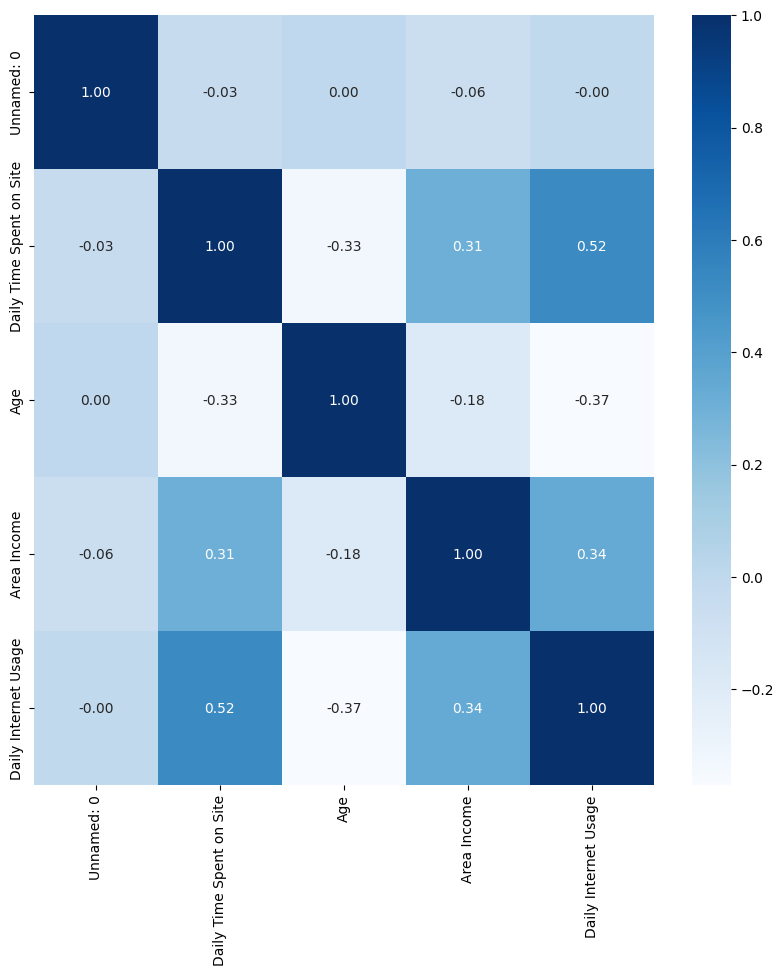

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
df_pps = pps.matrix(df)
matrix_df = df_pps[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

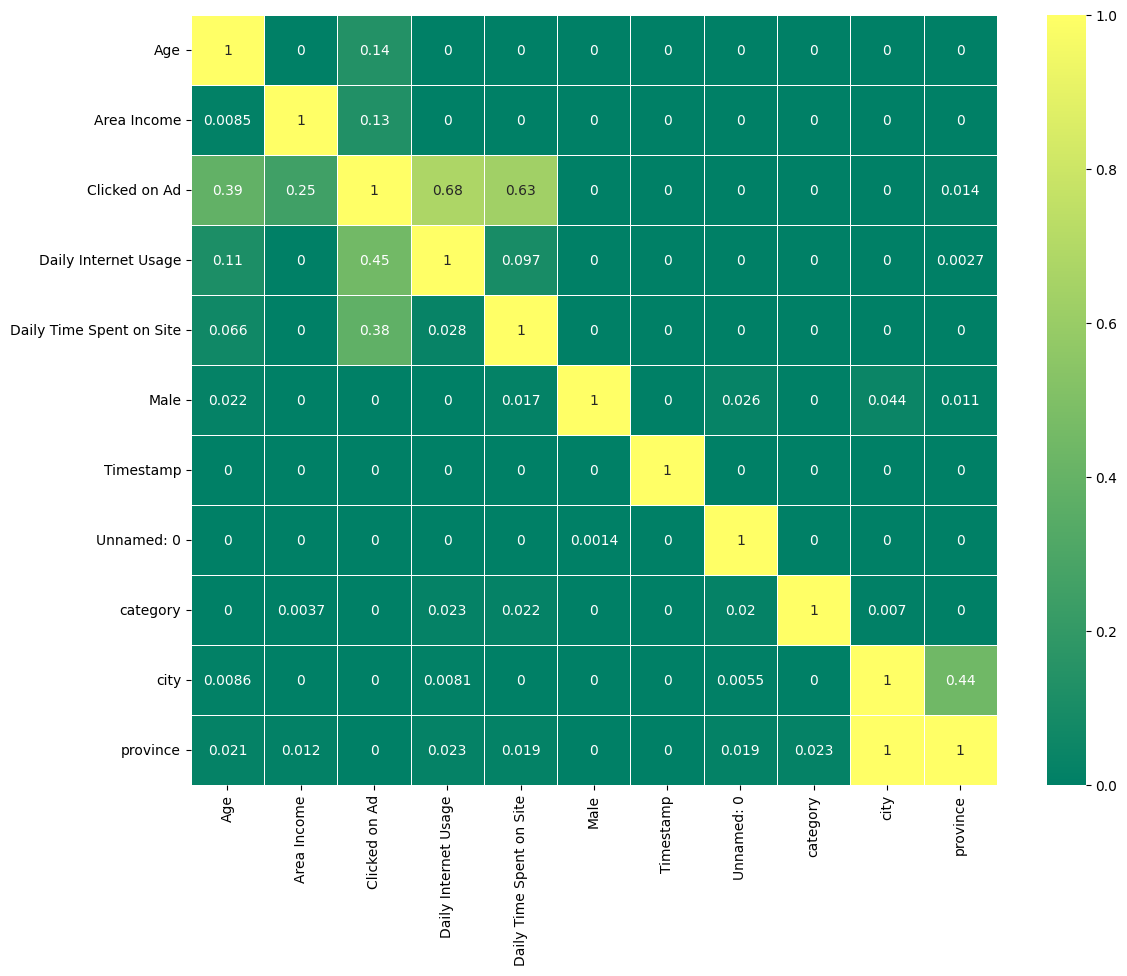

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="summer", linewidths=0.5, annot=True)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

## Stage 2: Data Cleaning & Preprocessing

In [ ]:
dfp = df.copy()
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


#### Adjusting Data

In [ ]:
# Change data type Timestamp to datetime
dfp['Timestamp'] = pd.to_datetime(dfp['Timestamp'])

# Change column name Male to Gender
dfp.rename(columns={'Male': 'Gender'}, inplace=True)

#### Handling Null Data

In [ ]:
dfp.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Gender                       3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [ ]:
novalue = dfp.isna().sum()*100/len(dfp)
print(round(novalue, 4).sort_values(ascending=False))

Daily Time Spent on Site    1.3
Area Income                 1.3
Daily Internet Usage        1.1
Gender                      0.3
Unnamed: 0                  0.0
Age                         0.0
Timestamp                   0.0
Clicked on Ad               0.0
city                        0.0
province                    0.0
category                    0.0
dtype: float64


In [ ]:
# Handline Null Data
dfp['Daily Time Spent on Site'] = dfp['Daily Time Spent on Site'].fillna(dfp['Daily Time Spent on Site'].median())
dfp['Area Income'] = dfp['Area Income'].fillna(dfp['Area Income'].median())
dfp['Daily Internet Usage'] = dfp['Daily Internet Usage'].fillna(dfp['Daily Internet Usage'].median())
dfp['Gender'] = dfp['Gender'].fillna(dfp['Gender'].mode()[0])

In [ ]:
dfp.isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Gender                      0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

### Handling Duplicated Data

In [ ]:
dfp.duplicated().any()

False

In [ ]:
dfp.duplicated().sum()

0

In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1000 non-null   int64         
 1   Daily Time Spent on Site  1000 non-null   float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               1000 non-null   float64       
 4   Daily Internet Usage      1000 non-null   float64       
 5   Gender                    1000 non-null   object        
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   object        
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  category                  1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 86.1+ KB


### Handling Outlier

In [ ]:
# Handling Outlier using Z-score

print(f'Total Rows BEFORE Outlier Handling Z-Score = {len(dfp)}')

filtered_entries = np.array([True] * len(dfp))
column = ['Area Income']

for col in column:
    zscore = abs(stats.zscore(dfp[col]))
    filtered_entries = (zscore < 3) & filtered_entries 
    
dfp = dfp[filtered_entries] 

print(f'Total Rows AFTER Outlier Handling Z-Score = {len(dfp)}')

Total Rows BEFORE Outlier Handling Z-Score = 1000
Total Rows AFTER Outlier Handling Z-Score = 997


### Feature Extraction

In [ ]:
# Extract datetime variables using timestamp
dfp['year'] = dfp.Timestamp.dt.year
dfp['month'] = dfp.Timestamp.dt.month
dfp['week'] = dfp.Timestamp.dt.isocalendar().week
dfp['day'] = dfp.Timestamp.dt.day


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

### Feature Encoding

Label Encoding

In [ ]:
# Gender
mapping_gender = {
    'Perempuan' : 0,
    'Laki-Laki' : 1
}

dfp['Gender'] = dfp['Gender'].map(mapping_gender)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Clicked on Ad
mapping_ads = {
    'No' : 0,
    'Yes' : 1
}

dfp['Clicked on Ad'] = dfp['Clicked on Ad'].map(mapping_ads)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


One Hot Encoding

In [ ]:
for i in ['city','province','category']:
    onehots = pd.get_dummies(dfp[i], prefix=i)
    dfp = dfp.join(onehots)

### Feature Selection

In [ ]:
# Delete some unused columns
dfp.drop(columns=['Unnamed: 0', 'Timestamp', 'city', 'province', 'category'], inplace=True)

In [ ]:
dfp.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,year,month,week,day,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,0,0,2016,3,12,27,...,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,1,0,2016,4,14,4,...,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,0,0,2016,3,10,13,...,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,1,0,2016,1,1,10,...,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,0,0,2016,6,22,3,...,0,0,0,1,0,0,0,0,0,0


### Splitting Data

In [ ]:
df_split = dfp.copy()

In [ ]:
X = df_split.drop(columns=['Clicked on Ad'])
y = df_split['Clicked on Ad']

In [ ]:
print(X.shape)
print(y.shape)

(997, 65)
(997,)


In [ ]:
y.value_counts()

0    500
1    497
Name: Clicked on Ad, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [ ]:
print('X_train size : ', X_train.shape)
print('X_test size  : ', X_test.shape)
print('y_train size : ', y_train.shape)
print('y_test size  : ', y_test.shape)

X_train size :  (697, 65)
X_test size  :  (300, 65)
y_train size :  (697,)
y_test size  :  (300,)


In [ ]:
y_test.value_counts()

1    159
0    141
Name: Clicked on Ad, dtype: int64

## Stage 3: Data Modelling

### Modelling Without Normalization & Standarization

In [ ]:
#model evaluation classification test (default)
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.5f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.5f" % accuracy_score(y_train, y_pred_train))
    
    print("Precision (Test Set): %.5f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.5f" % precision_score(y_train, y_pred_train))
    
    print("Recall (Test Set): %.5f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.5f" % recall_score(y_train, y_pred_train))
    
    print("F1-Score (Test Set): %.5f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.5f" % f1_score(y_train, y_pred_train))
    
    print("roc_auc (test-proba): %.5f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.5f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

    
def cfm_test(model):# Membuat Confusion Matrix (Test)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
    plt.title('Confusion Matrix (Test)')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')

def cfm_train(model):# Membuat Confusion Matrix (Test)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    cnf_matrix = confusion_matrix(y_train, y_pred_train)
    print(classification_report(y_train, y_pred_train))
    sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
    plt.title('Confusion Matrix (Train)')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(5).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
def tab_eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    X_train, X_test, y_train, y_test
    
    acc_test = accuracy_score(y_test, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred)
    precision_train = precision_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred)
    f1_train = f1_score(y_train, y_pred_train)
    roc_auc_train = roc_auc_score(y_train, y_pred_proba_train[:, 1])
    roc_auc_test = roc_auc_score(y_test, y_pred_proba[:, 1])
    
    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    roc_auc_crossval_train = round(score['train_score'].mean(), 4)
    roc_auc_crossval_test = round(score['test_score'].mean(), 4)
        
    eval_result = {
        'Test Accuracy': acc_test,
        'Test Precision': precision_test,
        'Test Recall': recall_test,
        'Test F1': f1_test,
        'Train Accuracy': acc_train,
        'Train Precision': precision_train,
        'Train Recall': recall_train,
        'Train F1': f1_train,
        'Train ROC AUC': roc_auc_train,
        'Test ROC AUC': roc_auc_test,
        'Crossval Train ROC AUC': roc_auc_crossval_train,
        'Crossval Test ROC AUC': roc_auc_crossval_test
    }
    return eval_result

In [ ]:
# Modelling for Selected Algorithms

# Selected Models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier', 'K-Nearest Neighbors', 'Gradient Boost']
algorithms = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier, GradientBoostingClassifier]

# List of results:
acc_test_ni = []
precision_test_ni = []
recall_test_ni = []
f1_test_ni = []
acc_train_ni = []
precision_train_ni = []
recall_train_ni = []
f1_train_ni = []
roc_auc_train_ni = []
roc_auc_test_ni = []
roc_auc_crossval_train_ni = []
roc_auc_crossval_test_ni = []

In [ ]:
i = 0
random_seed = [DecisionTreeClassifier, RandomForestClassifier]

for model_type in algorithms:
    # Fitting and using the algorithms
    if model_type in random_seed:
      model = model_type(random_state = 42)
    else:
      model = model_type()
    model.fit(X_train, y_train)
    print(models[i])
    result = tab_eval_classification(model)
    
    # Adding the results to the list
    acc_test_ni.append(result['Test Accuracy'])
    precision_test_ni.append(result['Test Precision'])
    recall_test_ni.append(result['Test Recall'])
    f1_test_ni.append(result['Test F1'])
    acc_train_ni.append(result['Train Accuracy'])
    precision_train_ni.append(result['Train Precision'])
    recall_train_ni.append(result['Train Recall'])
    f1_train_ni.append(result['Train F1'])
    roc_auc_train_ni.append(result['Train ROC AUC'])
    roc_auc_test_ni.append(result['Test ROC AUC'])
    roc_auc_crossval_train_ni.append(result['Crossval Train ROC AUC'])
    roc_auc_crossval_test_ni.append(result['Crossval Test ROC AUC'])
    
    i += 1

Logistic Regression


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Decision Tree
Random Forest Classifier
K-Nearest Neighbors
Gradient Boost


#### Summary All Algorithm

In [ ]:
result_df = pd.DataFrame(list(zip(models, acc_test_ni, acc_train_ni, precision_test_ni, precision_train_ni, recall_test_ni, recall_train_ni, f1_test_ni, f1_train_ni, roc_auc_train_ni, roc_auc_test_ni, roc_auc_crossval_train_ni, roc_auc_crossval_test_ni)), columns=['Algorithms', 'Test Accuracy', 'Train Accuracy', 'Test Precision', 'Train Precision', 'Test Recall', 'Train Recall', 'Test F1', 'Train F1', 'Train ROC AUC', 'Test ROC AUC', 'Crossval Train ROC AUC', 'Crossval Test ROC AUC'])

In [ ]:
result_df

,Algorithms,Test Accuracy,Train Accuracy,Test Precision,Train Precision,Test Recall,Train Recall,Test F1,Train F1,Train ROC AUC,Test ROC AUC,Crossval Train ROC AUC,Crossval Test ROC AUC
0,Logistic Regression,0.470000,0.515065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.776153,0.751773,0.7679,0.7678
1,Decision Tree,0.940000,1.000000,0.943396,1.000000,0.943396,1.000000,0.943396,1.000000,1.000000,0.939783,1.0000,0.9418
2,Random Forest Classifier,0.956667,1.000000,0.962025,1.000000,0.955975,1.000000,0.958991,1.000000,1.000000,0.985436,1.0000,0.9902
3,K-Nearest Neighbors,0.630000,0.787661,0.687500,0.816667,0.553459,0.724852,0.613240,0.768025,0.869666,0.668116,0.8503,0.7053
4,Gradient Boost,0.966667,1.000000,0.974522,1.000000,0.962264,1.000000,0.968354,1.000000,1.000000,0.983853,1.0000,0.9864


#### Logistic Regression

In [ ]:
logreg = LogisticRegression(random_state = 42)#, class_weight='balanced')
logreg.fit(X_train, y_train)
eval_classification(logreg)

Accuracy (Test Set): 0.47000
Accuracy (Train Set): 0.51506
Precision (Test Set): 0.00000
Precision (Train Set): 0.00000
Recall (Test Set): 0.00000
Recall (Train Set): 0.00000
F1-Score (Test Set): 0.00000
F1-Score (Train Set): 0.00000
roc_auc (test-proba): 0.75177
roc_auc (train-proba): 0.77615
roc_auc (crossval train): 0.7678920041011101
roc_auc (crossval test): 0.7677917171717172


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


              precision    recall  f1-score   support

           0       0.52      1.00      0.68       359
           1       0.00      0.00      0.00       338

    accuracy                           0.52       697
   macro avg       0.26      0.50      0.34       697
weighted avg       0.27      0.52      0.35       697



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


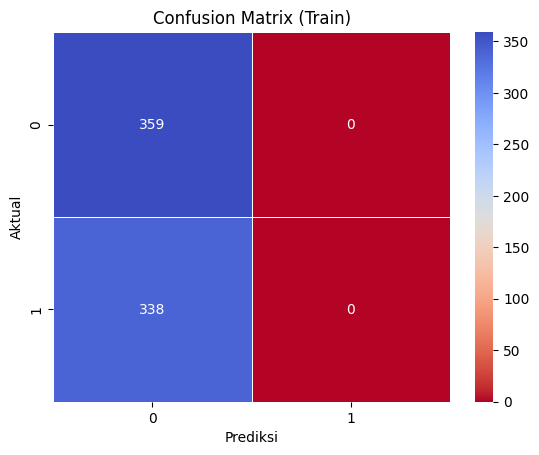

In [ ]:
cfm_train(logreg)

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


              precision    recall  f1-score   support

           0       0.47      1.00      0.64       141
           1       0.00      0.00      0.00       159

    accuracy                           0.47       300
   macro avg       0.23      0.50      0.32       300
weighted avg       0.22      0.47      0.30       300



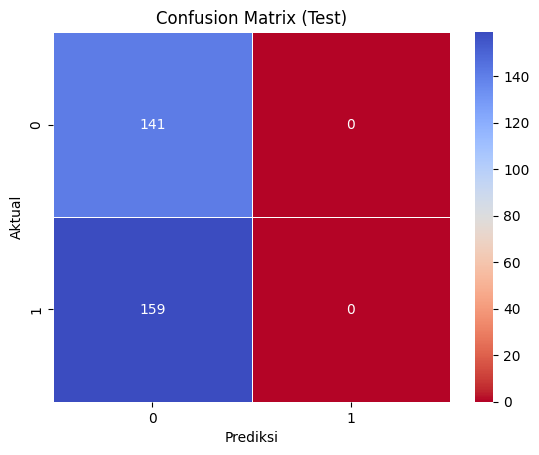

In [ ]:
cfm_test(logreg)

#### Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.94000
Accuracy (Train Set): 1.00000
Precision (Test Set): 0.94340
Precision (Train Set): 1.00000
Recall (Test Set): 0.94340
Recall (Train Set): 1.00000
F1-Score (Test Set): 0.94340
F1-Score (Train Set): 1.00000
roc_auc (test-proba): 0.93978
roc_auc (train-proba): 1.00000
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9418181818181818


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      1.00      1.00       338

    accuracy                           1.00       697
   macro avg       1.00      1.00      1.00       697
weighted avg       1.00      1.00      1.00       697



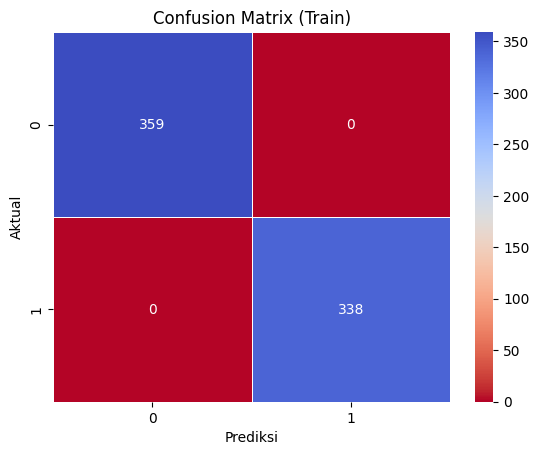

In [ ]:
cfm_train(dt)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       141
           1       0.94      0.94      0.94       159

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



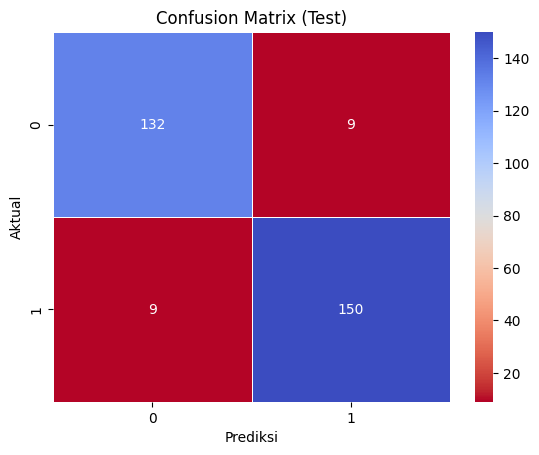

In [ ]:
cfm_test(dt)

#### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.95667
Accuracy (Train Set): 1.00000
Precision (Test Set): 0.96203
Precision (Train Set): 1.00000
Recall (Test Set): 0.95597
Recall (Train Set): 1.00000
F1-Score (Test Set): 0.95899
F1-Score (Train Set): 1.00000
roc_auc (test-proba): 0.98544
roc_auc (train-proba): 1.00000
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9901546464646465


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      1.00      1.00       338

    accuracy                           1.00       697
   macro avg       1.00      1.00      1.00       697
weighted avg       1.00      1.00      1.00       697



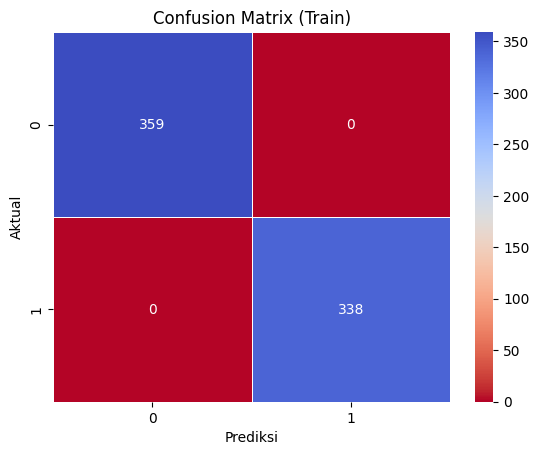

In [ ]:
cfm_train(rf)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       141
           1       0.96      0.96      0.96       159

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



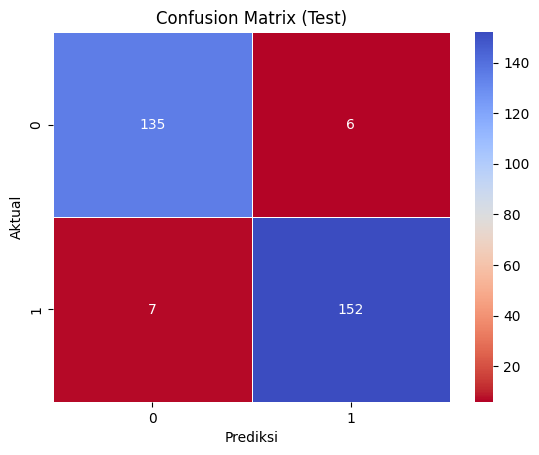

In [ ]:
cfm_test(rf)

#### K-Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
eval_classification(knn)

Accuracy (Test Set): 0.63000
Accuracy (Train Set): 0.78766
Precision (Test Set): 0.68750
Precision (Train Set): 0.81667
Recall (Test Set): 0.55346
Recall (Train Set): 0.72485
F1-Score (Test Set): 0.61324
F1-Score (Train Set): 0.76803
roc_auc (test-proba): 0.66812
roc_auc (train-proba): 0.86967
roc_auc (crossval train): 0.8502786872017518
roc_auc (crossval test): 0.7053148484848485


              precision    recall  f1-score   support

           0       0.77      0.85      0.80       359
           1       0.82      0.72      0.77       338

    accuracy                           0.79       697
   macro avg       0.79      0.79      0.79       697
weighted avg       0.79      0.79      0.79       697



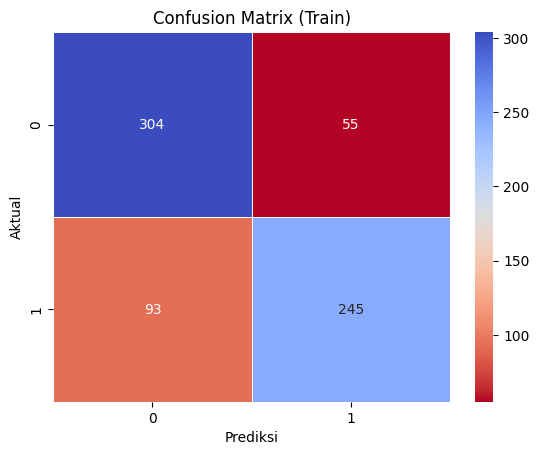

In [ ]:
cfm_train(knn)

              precision    recall  f1-score   support

           0       0.59      0.72      0.65       141
           1       0.69      0.55      0.61       159

    accuracy                           0.63       300
   macro avg       0.64      0.63      0.63       300
weighted avg       0.64      0.63      0.63       300



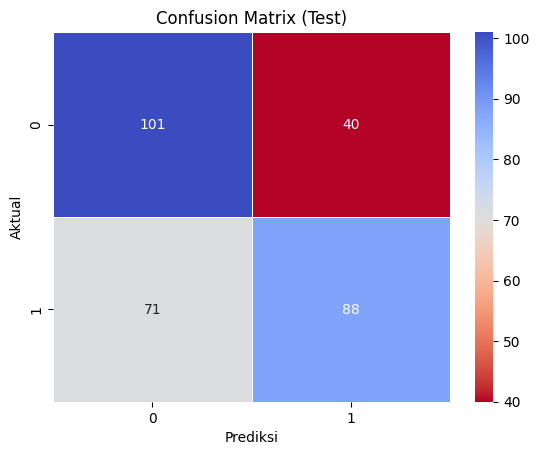

In [ ]:
cfm_test(knn)

#### Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
eval_classification(gb)

Accuracy (Test Set): 0.96667
Accuracy (Train Set): 1.00000
Precision (Test Set): 0.97452
Precision (Train Set): 1.00000
Recall (Test Set): 0.96226
Recall (Train Set): 1.00000
F1-Score (Test Set): 0.96835
F1-Score (Train Set): 1.00000
roc_auc (test-proba): 0.98408
roc_auc (train-proba): 1.00000
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9865509090909089


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      1.00      1.00       338

    accuracy                           1.00       697
   macro avg       1.00      1.00      1.00       697
weighted avg       1.00      1.00      1.00       697



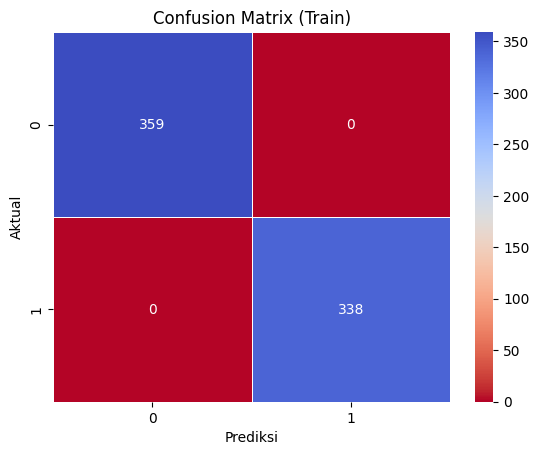

In [ ]:
cfm_train(gb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      1.00      1.00       338

    accuracy                           1.00       697
   macro avg       1.00      1.00      1.00       697
weighted avg       1.00      1.00      1.00       697



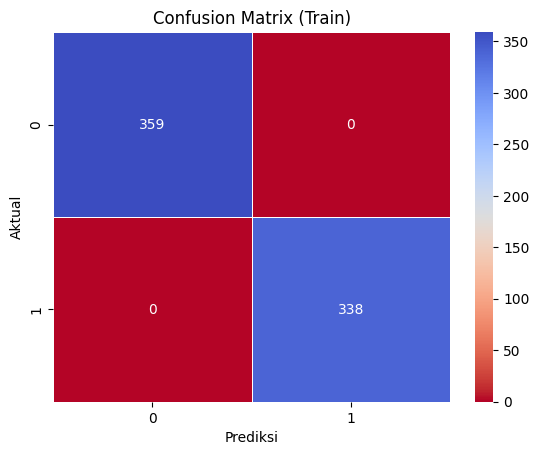

In [ ]:
cfm_train(gb)

### Modelling With Normalization & Standarization

In [ ]:
#X_train_scaled = X_train.copy()
#X_test_scaled = X_test.copy()

In [ ]:
#feature = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'year', 'month', 'week', 'day']
#for col in features :
  #X_train_scaled[col] = MinMaxScaler().fit_transform(X_train_scaled[col].values.reshape(len(X_train_scaled), 1))
  #X_test_scaled[col] = MinMaxScaler().fit_transform(X_test_scaled[col].values.reshape(len(X_test_scaled), 1))

In [ ]:
X_scaled = X.copy()
y_scaled = y.copy()

In [ ]:
X_scaled['Daily Time Spent on Site'] = MinMaxScaler().fit_transform(X_scaled['Daily Time Spent on Site'].values.reshape(len(X), 1))
X_scaled['Age'] = MinMaxScaler().fit_transform(X_scaled['Age'].values.reshape(len(X), 1))
X_scaled['Area Income'] = MinMaxScaler().fit_transform(X_scaled['Area Income'].values.reshape(len(X), 1))
X_scaled['Daily Internet Usage'] = MinMaxScaler().fit_transform(X_scaled['Daily Internet Usage'].values.reshape(len(X), 1))
X_scaled['year'] = MinMaxScaler().fit_transform(X_scaled['year'].values.reshape(len(X), 1))
X_scaled['month'] = MinMaxScaler().fit_transform(X_scaled['month'].values.reshape(len(X), 1))
X_scaled['week'] = MinMaxScaler().fit_transform(X_scaled['day'].values.reshape(len(X), 1))
X_scaled['day'] = MinMaxScaler().fit_transform(X_scaled['day'].values.reshape(len(X), 1))

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.3, random_state = 42)

In [ ]:
X_train_scaled.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,year,month,week,day,city_Balikpapan,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.0,697.000000,697.000000,697.000000,697.000000,...,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000
mean,0.558063,0.406402,0.613954,0.474361,0.472023,0.0,0.470827,0.470253,0.470253,0.017217,...,0.088953,0.086083,0.113343,0.086083,0.101865,0.097561,0.094692,0.114778,0.113343,0.103300
std,0.266129,0.210312,0.209461,0.271967,0.499575,0.0,0.324884,0.288633,0.288633,0.130171,...,0.284880,0.280688,0.317239,0.280688,0.302688,0.296933,0.292999,0.318982,0.317239,0.304569
min,0.000000,0.000000,0.000000,0.001603,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.335713,0.238095,0.486730,0.221846,0.000000,0.0,0.166667,0.233333,0.233333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.613972,0.380952,0.648204,0.499723,0.000000,0.0,0.500000,0.466667,0.466667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.783614,0.547619,0.775165,0.717685,1.000000,0.0,0.833333,0.700000,0.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.998980,1.000000,1.000000,0.966159,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_test_scaled.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,year,month,week,day,city_Balikpapan,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.532499,0.399762,0.629947,0.436596,0.493333,0.0,0.463889,0.511556,0.511556,0.020000,...,0.093333,0.123333,0.073333,0.103333,0.093333,0.100000,0.126667,0.093333,0.110000,0.083333
std,0.271758,0.206898,0.199052,0.261621,0.500791,0.0,0.312759,0.295563,0.295563,0.140234,...,0.291385,0.329369,0.261118,0.304902,0.291385,0.300501,0.333155,0.291385,0.313413,0.276847
min,0.000000,0.023810,0.103425,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.289988,0.238095,0.509947,0.200271,0.000000,0.0,0.166667,0.266667,0.266667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.582781,0.380952,0.659607,0.422980,0.000000,0.0,0.500000,0.516667,0.516667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.752890,0.523810,0.786018,0.657847,1.000000,0.0,0.666667,0.766667,0.766667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.976190,0.978214,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#model evaluation classification test (norm/std)
def eval_std_classification(model):
    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train_scaled)
    
    print("Accuracy (Test Set): %.5f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.5f" % accuracy_score(y_train, y_pred_train))
    
    print("Precision (Test Set): %.5f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.5f" % precision_score(y_train, y_pred_train))
    
    print("Recall (Test Set): %.5f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.5f" % recall_score(y_train, y_pred_train))
    
    print("F1-Score (Test Set): %.5f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.5f" % f1_score(y_train, y_pred_train))
    
    print("roc_auc (test-proba): %.5f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.5f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

    
def cfm_std_test(model):# Membuat Confusion Matrix (Test)
    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train_scaled)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
    plt.title('Confusion Matrix (Test)')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')

def cfm_std_train(model):# Membuat Confusion Matrix (Test)
    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train_scaled)
    cnf_matrix = confusion_matrix(y_train, y_pred_train)
    print(classification_report(y_train, y_pred_train))
    sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
    plt.title('Confusion Matrix (Train)')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')

In [ ]:
def tab_eval_std_classification(model):
    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train_scaled)
        
    acc_test = accuracy_score(y_test, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred)
    precision_train = precision_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred)
    f1_train = f1_score(y_train, y_pred_train)
    roc_auc_train = roc_auc_score(y_train, y_pred_proba_train[:, 1])
    roc_auc_test = roc_auc_score(y_test, y_pred_proba[:, 1])
    
    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    roc_auc_crossval_train = round(score['train_score'].mean(), 4)
    roc_auc_crossval_test = round(score['test_score'].mean(), 4)
        
    eval_result = {
        'Test Accuracy': acc_test,
        'Test Precision': precision_test,
        'Test Recall': recall_test,
        'Test F1': f1_test,
        'Train Accuracy': acc_train,
        'Train Precision': precision_train,
        'Train Recall': recall_train,
        'Train F1': f1_train,
        'Train ROC AUC': roc_auc_train,
        'Test ROC AUC': roc_auc_test,
        'Crossval Train ROC AUC': roc_auc_crossval_train,
        'Crossval Test ROC AUC': roc_auc_crossval_test
    }
    return eval_result

In [ ]:
# Modelling for Selected Algorithms

# Selected Models
models2 = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier', 'K-Nearest Neighbors', 'Gradient Boost']
algorithms2 = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier, GradientBoostingClassifier]

# List of results:
acc_test_std = []
precision_test_std = []
recall_test_std = []
f1_test_std = []
acc_train_std = []
precision_train_std = []
recall_train_std = []
f1_train_std = []
roc_auc_train_std = []
roc_auc_test_std = []
roc_auc_crossval_train_std = []
roc_auc_crossval_test_std = []

In [ ]:
i = 0
random_seed2 = [DecisionTreeClassifier, RandomForestClassifier]

for model_type2 in algorithms2:
    # Fitting and using the algorithms
    if model_type2 in random_seed2:
      model2 = model_type2(random_state = 42)
    else:
      model2 = model_type2()
    model2.fit(X_train_scaled, y_train)
    print(models2[i])
    result = tab_eval_std_classification(model2)
    
    # Adding the results to the list
    acc_test_std.append(result['Test Accuracy'])
    precision_test_std.append(result['Test Precision'])
    recall_test_std.append(result['Test Recall'])
    f1_test_std.append(result['Test F1'])
    acc_train_std.append(result['Train Accuracy'])
    precision_train_std.append(result['Train Precision'])
    recall_train_std.append(result['Train Recall'])
    f1_train_std.append(result['Train F1'])
    roc_auc_train_std.append(result['Train ROC AUC'])
    roc_auc_test_std.append(result['Test ROC AUC'])
    roc_auc_crossval_train_std.append(result['Crossval Train ROC AUC'])
    roc_auc_crossval_test_std.append(result['Crossval Test ROC AUC'])
    
    i += 1

Logistic Regression
Decision Tree
Random Forest Classifier
K-Nearest Neighbors
Gradient Boost


#### Summary All Algorithm

In [ ]:
result_std_df = pd.DataFrame(list(zip(models, acc_test_std, acc_train_std, precision_test_std, precision_train_std, recall_test_std, recall_train_std, f1_test_std, f1_train_std, roc_auc_train_std, roc_auc_test_std, roc_auc_crossval_train_std, roc_auc_crossval_test_std)), columns=['Algorithms', 'Test Accuracy', 'Train Accuracy', 'Test Precision', 'Train Precision', 'Test Recall', 'Train Recall', 'Test F1', 'Train F1', 'Train ROC AUC', 'Test ROC AUC', 'Crossval Train ROC AUC', 'Crossval Test ROC AUC'])

In [ ]:
result_std_df

,Algorithms,Test Accuracy,Train Accuracy,Test Precision,Train Precision,Test Recall,Train Recall,Test F1,Train F1,Train ROC AUC,Test ROC AUC,Crossval Train ROC AUC,Crossval Test ROC AUC
0,Logistic Regression,0.960000,0.975610,0.980392,0.990826,0.943396,0.958580,0.961538,0.974436,0.994149,0.984254,0.7679,0.7678
1,Decision Tree,0.936667,1.000000,0.937500,1.000000,0.943396,1.000000,0.940439,1.000000,1.000000,0.936237,1.0000,0.9418
2,Random Forest Classifier,0.950000,1.000000,0.961538,1.000000,0.943396,1.000000,0.952381,1.000000,1.000000,0.984589,1.0000,0.9902
3,K-Nearest Neighbors,0.756667,0.865136,0.816176,0.898693,0.698113,0.813609,0.752542,0.854037,0.928557,0.812770,0.8503,0.7053
4,Gradient Boost,0.966667,1.000000,0.974522,1.000000,0.962264,1.000000,0.968354,1.000000,1.000000,0.983987,1.0000,0.9866


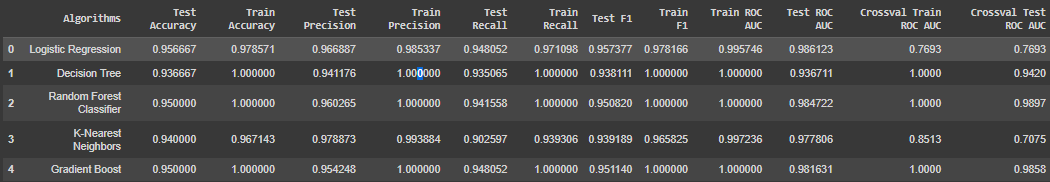

#### Logistic Regression

In [ ]:
logreg_std = LogisticRegression(random_state = 42)#, class_weight='balanced')
logreg_std.fit(X_train_scaled, y_train)
eval_std_classification(logreg_std)

Accuracy (Test Set): 0.96000
Accuracy (Train Set): 0.97561
Precision (Test Set): 0.98039
Precision (Train Set): 0.99083
Recall (Test Set): 0.94340
Recall (Train Set): 0.95858
F1-Score (Test Set): 0.96154
F1-Score (Train Set): 0.97444
roc_auc (test-proba): 0.98425
roc_auc (train-proba): 0.99415
roc_auc (crossval train): 0.7678920041011101
roc_auc (crossval test): 0.7677917171717172


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       359
           1       0.99      0.96      0.97       338

    accuracy                           0.98       697
   macro avg       0.98      0.98      0.98       697
weighted avg       0.98      0.98      0.98       697



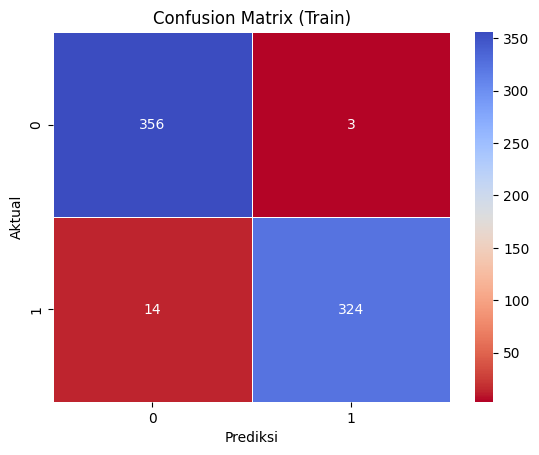

In [ ]:
cfm_std_train(logreg_std)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       141
           1       0.98      0.94      0.96       159

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



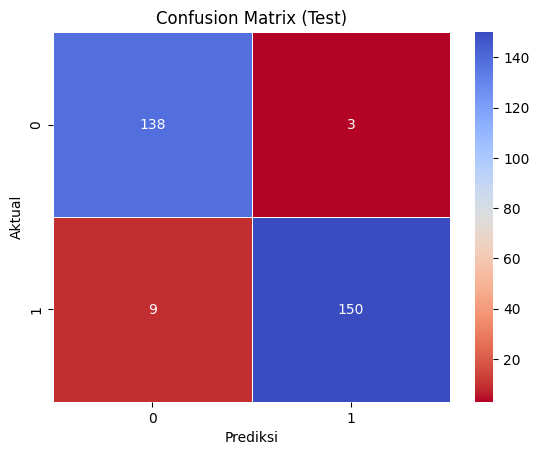

In [ ]:
cfm_std_test(logreg_std)

#### Decision Tree

In [ ]:
dt_std = DecisionTreeClassifier(random_state=42)
dt_std.fit(X_train_scaled, y_train)
eval_std_classification(dt_std)

Accuracy (Test Set): 0.93667
Accuracy (Train Set): 1.00000
Precision (Test Set): 0.93750
Precision (Train Set): 1.00000
Recall (Test Set): 0.94340
Recall (Train Set): 1.00000
F1-Score (Test Set): 0.94044
F1-Score (Train Set): 1.00000
roc_auc (test-proba): 0.93624
roc_auc (train-proba): 1.00000
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9418181818181818


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      1.00      1.00       338

    accuracy                           1.00       697
   macro avg       1.00      1.00      1.00       697
weighted avg       1.00      1.00      1.00       697



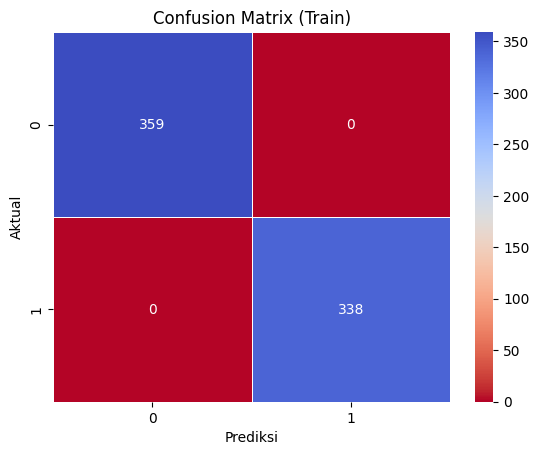

In [ ]:
cfm_std_train(dt_std)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       141
           1       0.94      0.94      0.94       159

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



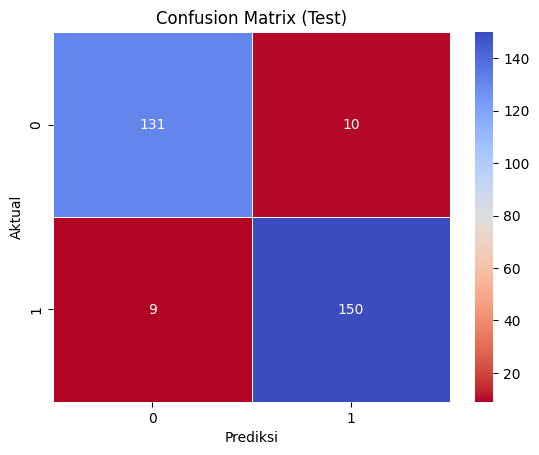

In [ ]:
cfm_std_test(dt_std)

#### Random Forest

In [ ]:
rf_std = RandomForestClassifier(random_state=42)
rf_std.fit(X_train_scaled, y_train)
eval_std_classification(rf_std)

Accuracy (Test Set): 0.95000
Accuracy (Train Set): 1.00000
Precision (Test Set): 0.96154
Precision (Train Set): 1.00000
Recall (Test Set): 0.94340
Recall (Train Set): 1.00000
F1-Score (Test Set): 0.95238
F1-Score (Train Set): 1.00000
roc_auc (test-proba): 0.98459
roc_auc (train-proba): 1.00000
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9901546464646465


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      1.00      1.00       338

    accuracy                           1.00       697
   macro avg       1.00      1.00      1.00       697
weighted avg       1.00      1.00      1.00       697



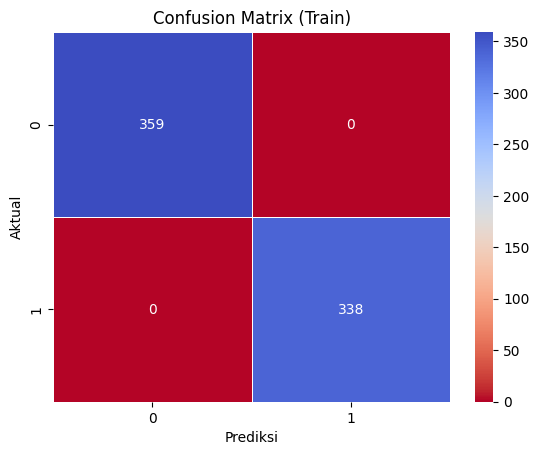

In [ ]:
cfm_std_train(rf_std)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       141
           1       0.96      0.94      0.95       159

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



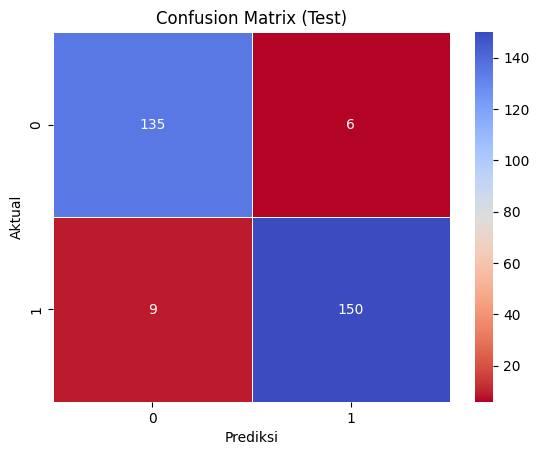

In [ ]:
cfm_std_test(rf_std)

#### K-Nearest Neighbor

In [ ]:
knn_std = KNeighborsClassifier()
knn_std.fit(X_train_scaled, y_train)
eval_std_classification(knn_std)

Accuracy (Test Set): 0.75667
Accuracy (Train Set): 0.86514
Precision (Test Set): 0.81618
Precision (Train Set): 0.89869
Recall (Test Set): 0.69811
Recall (Train Set): 0.81361
F1-Score (Test Set): 0.75254
F1-Score (Train Set): 0.85404
roc_auc (test-proba): 0.81277
roc_auc (train-proba): 0.92856
roc_auc (crossval train): 0.8502786872017518
roc_auc (crossval test): 0.7053148484848485


              precision    recall  f1-score   support

           0       0.84      0.91      0.87       359
           1       0.90      0.81      0.85       338

    accuracy                           0.87       697
   macro avg       0.87      0.86      0.86       697
weighted avg       0.87      0.87      0.86       697



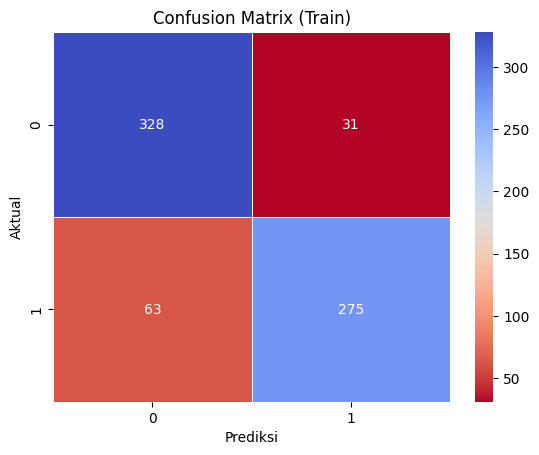

In [ ]:
cfm_std_train(knn_std)

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       141
           1       0.82      0.70      0.75       159

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300



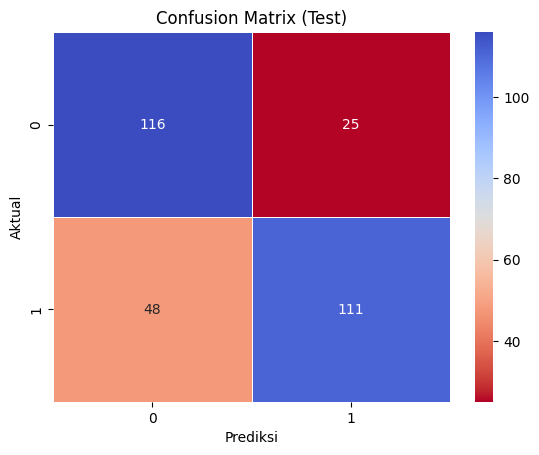

In [ ]:
cfm_std_test(knn_std)

#### Gradient Boosting

In [ ]:
gb_std = GradientBoostingClassifier()
gb_std.fit(X_train_scaled, y_train)
eval_std_classification(gb_std)

Accuracy (Test Set): 0.96667
Accuracy (Train Set): 1.00000
Precision (Test Set): 0.97452
Precision (Train Set): 1.00000
Recall (Test Set): 0.96226
Recall (Train Set): 1.00000
F1-Score (Test Set): 0.96835
F1-Score (Train Set): 1.00000
roc_auc (test-proba): 0.98390
roc_auc (train-proba): 1.00000
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9863284848484849


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      1.00      1.00       338

    accuracy                           1.00       697
   macro avg       1.00      1.00      1.00       697
weighted avg       1.00      1.00      1.00       697



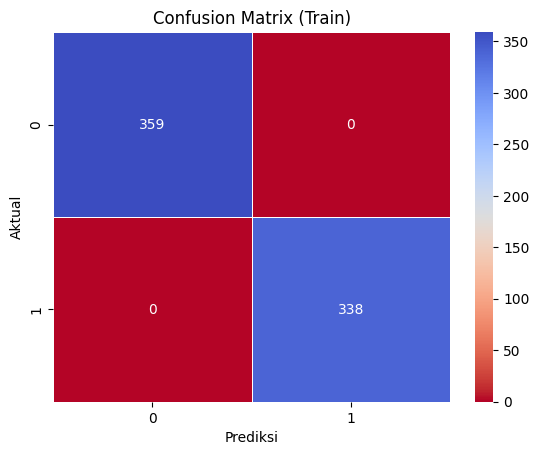

In [ ]:
cfm_std_train(gb_std)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       141
           1       0.97      0.96      0.97       159

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



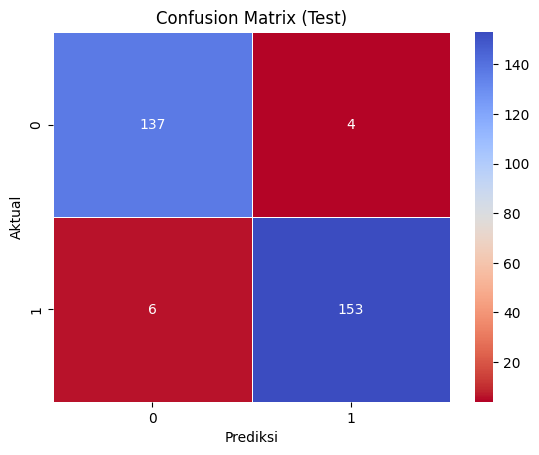

In [ ]:
cfm_std_test(gb_std)

### Feature Importance

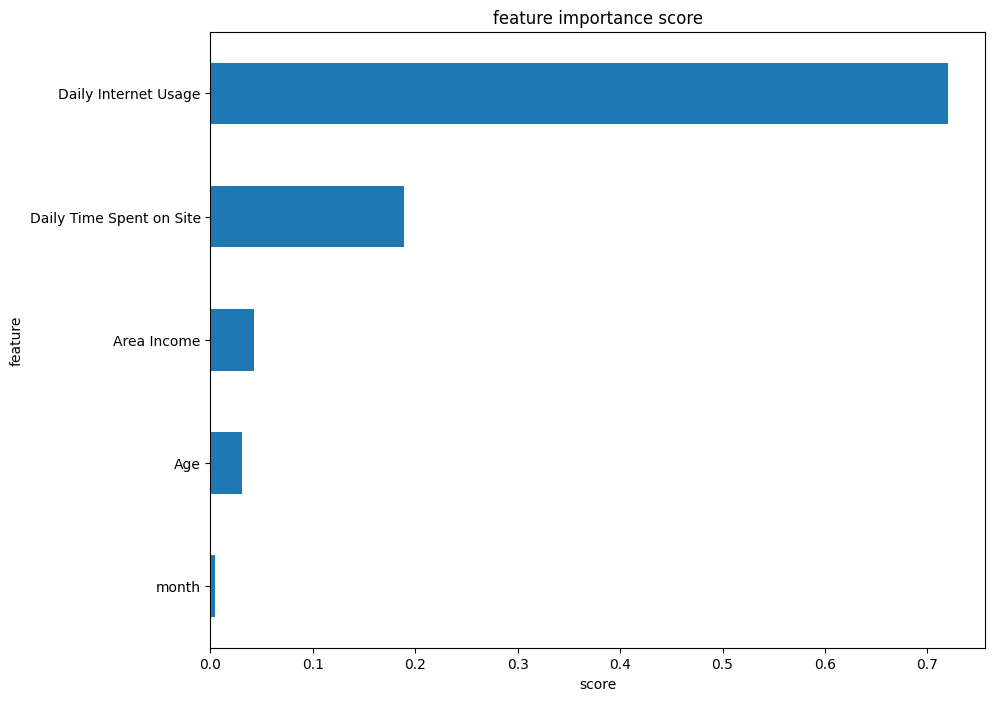

In [ ]:
show_feature_importance(gb_std)

#### Interpretation

In the Predict Customer Clicked Ads Classification by Using Machine Learning topic, we want to focus on precision and recall as our main evaluation metrics. Precision measures the proportion of true positives among all the predicted positives, which means the percentage of times our model correctly predicted that a customer would click on an ad among all the times it predicted that a customer would click on an ad. Recall measures the proportion of true positives among all the actual positives, which means the percentage of times our model correctly identified customers who actually clicked on an ad among all the customers who actually clicked on an ad. By focusing on precision and recall, we can ensure that our model minimizes the risk of false positives and false negatives, which are the predictions that the model agrees or disagrees with but should have been the opposite. So, F1 Score is the best metrics for this model which is the harmonic mean of precision and recall. That means to balance both precision and recall.
From the modelling experiment without feature transformation, we get Random Forest and Gradient Boosting that have best F1 Score. While in the experiment with feature transformation (Normalization/Standarization), we use Minmaxscaler. This modelling process can escalate Logistic Regression and K-Nearest Neighbor significantly, and the best model based on F1 Score is Logistic Regression and Gradient Boosting.
So, the model that we will use is Gradient Boosting from experiment with feature transformation.

### Shap Value

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


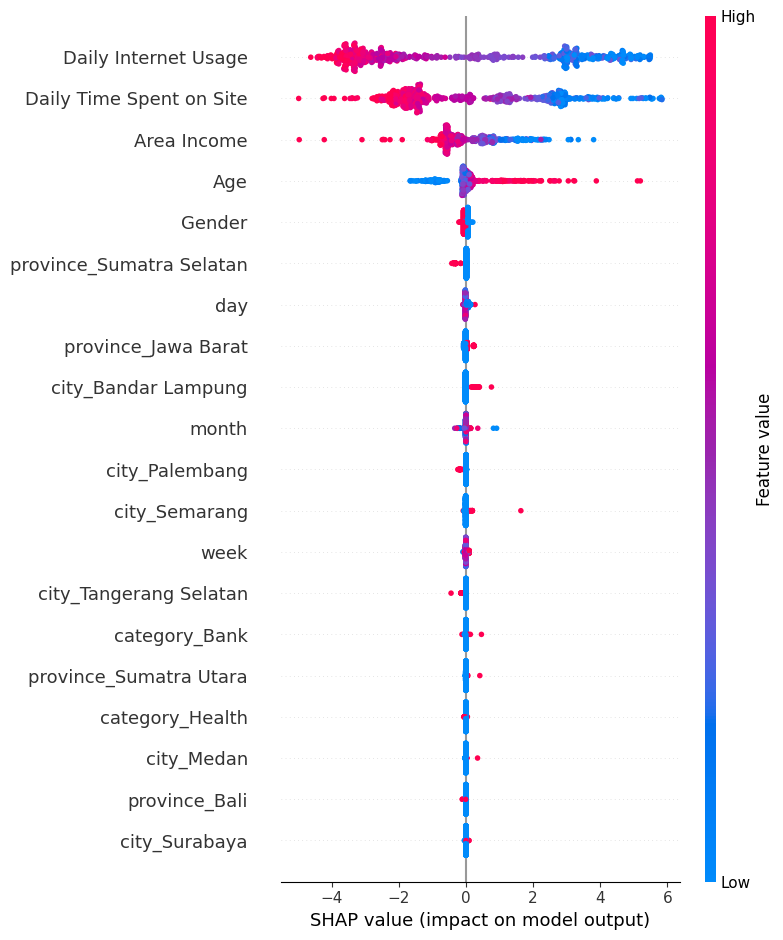

In [ ]:
explainer = shap.TreeExplainer(gb_std)
shap_values = explainer.shap_values(X_train_scaled)
shap.summary_plot(shap_values, X_train_scaled)

## Stage 4: Business Recommendation and Simulation

Business Impact & Recommendation

### Recomendation

In [ ]:
df_rec = df.copy()

In [ ]:
df_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [ ]:
# Daily Internet Usage Grouping
diu = []
for x in df_rec['Daily Internet Usage']:
    if x >= 100 and x <= 140:
      stage = '100 - 140'
    elif x >= 141 and x <= 180:
      stage = '141 - 180'
    elif x >= 181 and x <= 225:
      stage = '181 - 225'
    else:
      stage = '> 225'
    diu.append(stage)

df_rec['diu_group'] = diu

In [ ]:
df_dg = df_rec.groupby(['Clicked on Ad', 'diu_group']).agg({'Age':'count'}).reset_index()
df_dg = df_dg.rename(columns={'Age':'Customers'})
df_dg['sum'] = df_dg['Customers'].sum()
df_dg['percentage'] = round((df_dg['Customers']/df_dg['sum'])*100, 3)
df_dg.sort_values(by=['Clicked on Ad'], ascending=False, inplace=True)
df_dg

,Clicked on Ad,diu_group,Customers,sum,percentage
3,Yes,100 - 140,254,1000,25.4
4,Yes,141 - 180,179,1000,17.9
5,Yes,181 - 225,44,1000,4.4
6,Yes,> 225,23,1000,2.3
0,No,141 - 180,44,1000,4.4
1,No,181 - 225,263,1000,26.3
2,No,> 225,193,1000,19.3


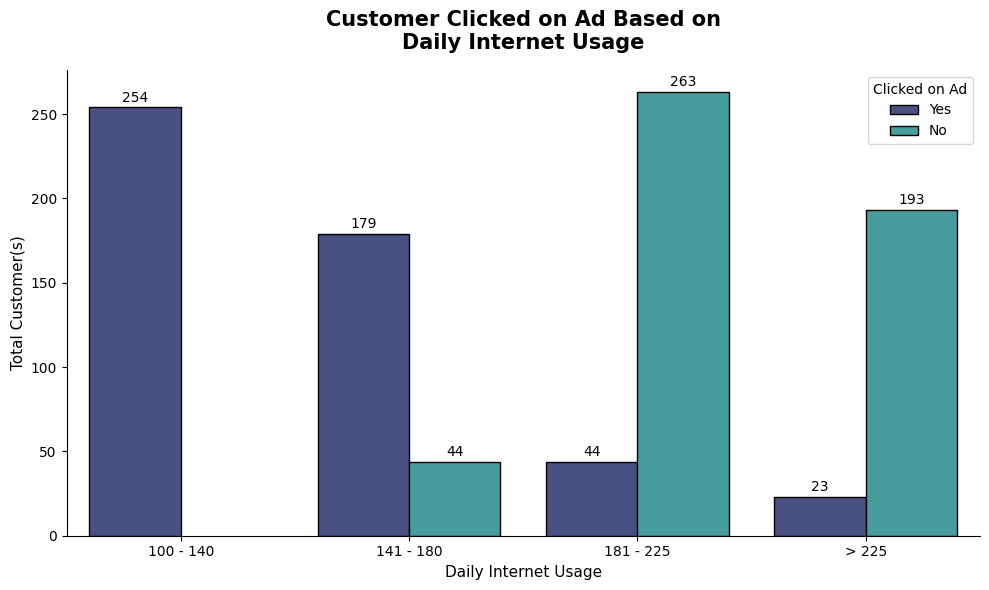

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Customer Clicked on Ad Based on\nDaily Internet Usage", fontsize=15, color='black', weight='bold', pad=15)
sns.barplot(x='diu_group', y='Customers', data=df_dg, hue='Clicked on Ad', edgecolor='black', palette='mako')

plt.xlabel('Daily Internet Usage', fontsize=11)
plt.ylabel('Total Customer(s)', fontsize=11)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)
#plt.bar_label(ax.containers[0], ['25.4%', '17.9%', '4.4%', '2.3%'], label_type='center', color='white', weight='bold')
#plt.bar_label(ax.containers[1], [' ', '4.4%', '26.3%', '19.3%'], padding=15, color='black', weight='bold')

sns.despine()
plt.tight_layout()

In [ ]:
# Daily Time Spent on Site Grouping
dts = []
for x in df_rec['Daily Time Spent on Site']:
    if x >= 30 and x <= 50:
      stage = '30 - 50'
    elif x >= 51 and x <= 70:
      stage = '51 - 70'
    else:
      stage = '> 70'
    dts.append(stage)
df_rec['dts_group'] = dts

In [ ]:
df_dts = df_rec.groupby(['Clicked on Ad', 'dts_group']).agg({'Age':'count'}).reset_index()
df_dts = df_dts.rename(columns={'Age':'Customers'})
df_dts['sum'] = df_dts['Customers'].sum()
df_dts['percentage'] = round((df_dts['Customers']/df_dts['sum'])*100, 3)
df_dts.sort_values(by=['Clicked on Ad'], ascending=False, inplace=True)
df_dts

,Clicked on Ad,dts_group,Customers,sum,percentage
3,Yes,30 - 50,229,1000,22.9
4,Yes,51 - 70,196,1000,19.6
5,Yes,> 70,75,1000,7.5
0,No,30 - 50,2,1000,0.2
1,No,51 - 70,90,1000,9.0
2,No,> 70,408,1000,40.8


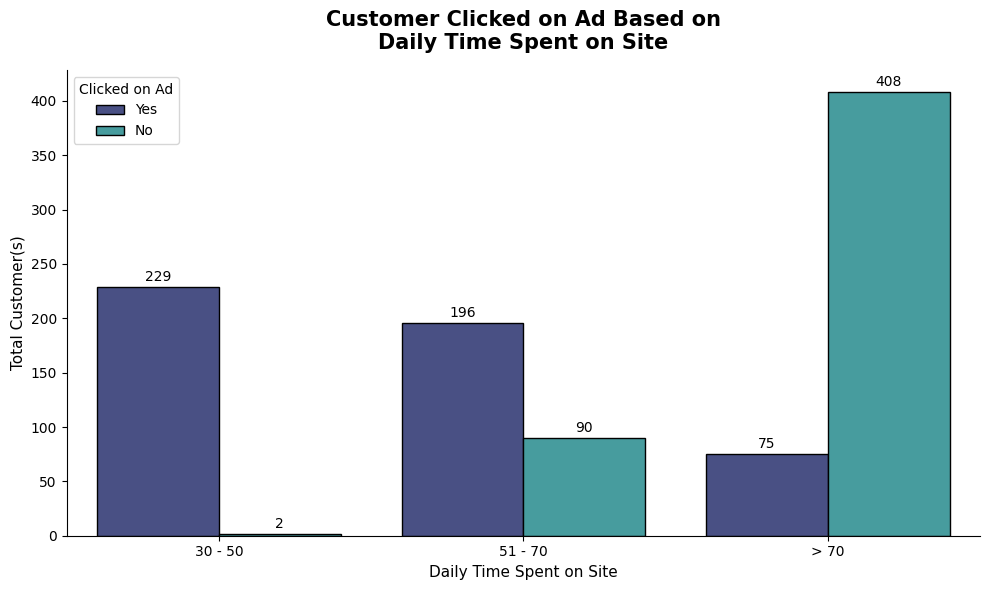

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Customer Clicked on Ad Based on\nDaily Time Spent on Site", fontsize=15, color='black', weight='bold', pad=15)
sns.barplot(x='dts_group', y='Customers', data=df_dts, hue='Clicked on Ad', edgecolor='black', palette='mako')

plt.xlabel('Daily Time Spent on Site', fontsize=11)
plt.ylabel('Total Customer(s)', fontsize=11)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)
#plt.bar_label(ax.containers[0], ['22.9%', '19.6%', '7.5%'], label_type='center', color='white', weight='bold')
#plt.bar_label(ax.containers[1], ['0.2%', '9.0%', '40.8%'], padding=15, color='black', weight='bold')

sns.despine()
plt.tight_layout()